In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import os 
from PIL import Image
import sklearn as sk
import tensorflow as tf

In [2]:
def get_jpg_path(file_dir='datasets\\birds\\train\\'):
    path=[]
    clazz=[]
    for root, dirs, files in os.walk(file_dir): 
        if len(dirs)==0:
            cls=root[-3:]
            cls=[int(cls)]*len(files)
            ph=[root+"\\"+p for p in files]
            path.extend(ph)
            clazz.extend(cls)
    return path,clazz
path,clazz=get_jpg_path('datasets\\birds\\train\\')

In [3]:
def enforce(img,corp=(224,224)):
    rs=np.zeros((5,224,224,3))
    box = [(0, 0, 224, 224),
          (76, 0, 300, 224),
          (76, 76, 300, 300),
          (0, 76, 224, 300),
          (38, 38, 262, 262)]
    idx=0
    for b in box:
        region = img.crop(b)
        npre=np.asarray(region)
        rs[idx]=npre
        idx+=1
    return rs

In [4]:
def onehot_label(clazz):
    index=0
    is_insight=set()
    hot=[0]*90
    onehot=[]
    for i in clazz:
        if i not in is_insight:
            is_insight.add(i)
            hot=[0]*90
            hot[index]=1
            index+=1
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
        onehot.append(hot)
    onehot=np.asarray(onehot)
    return onehot

In [5]:
def del_bad_imgs(path):
    index=0
    for p in path:
        im=Image.open(p)
        npim=np.asarray(im)
        if len(npim.shape)==2:
            os.remove(p)
            print(index,npim.shape,"has been removed")
        index+=1
del_bad_imgs(path)

In [6]:
def reszie_jpg(path,shape=(3830,300,300,3)):
    imgs=[]
    index=0
    for p in path:
        im=Image.open(p)
        im=im.resize(shape[1:3])
        ims=enforce(im)
        for i in ims:
            imgs.append(i)
    return np.asarray(imgs,dtype="float")

In [7]:
imgs=reszie_jpg(path)
imgs.shape

(19120, 224, 224, 3)

In [8]:
onehot=onehot_label(clazz)
onehot.shape

(19120, 90)

In [9]:
imgs12 = imgs[339].astype(np.float32)
imgs12

array([[[146., 139.,  84.],
        [148., 141.,  86.],
        [153., 146.,  92.],
        ...,
        [184., 192., 195.],
        [184., 192., 195.],
        [184., 192., 195.]],

       [[146., 138.,  89.],
        [147., 139.,  90.],
        [152., 144.,  97.],
        ...,
        [187., 195., 198.],
        [187., 195., 198.],
        [186., 194., 197.]],

       [[145., 137.,  88.],
        [146., 138.,  91.],
        [151., 143.,  96.],
        ...,
        [189., 197., 200.],
        [187., 195., 198.],
        [186., 194., 197.]],

       ...,

       [[177., 174., 183.],
        [193., 193., 201.],
        [196., 203., 211.],
        ...,
        [196., 199., 214.],
        [203., 206., 221.],
        [202., 206., 218.]],

       [[203., 200., 211.],
        [193., 193., 203.],
        [204., 211., 221.],
        ...,
        [210., 213., 232.],
        [204., 207., 224.],
        [207., 210., 227.]],

       [[170., 178., 180.],
        [211., 219., 221.],
        [215., 2

In [20]:
min_size_x=imgs[:339]
min_size_y=onehot[:339,:2]
min_size_y_=[]
for i in min_size_y:
    if i[0]==0:
        min_size_y_.append(-1)
    else:
        min_size_y_.append(1)

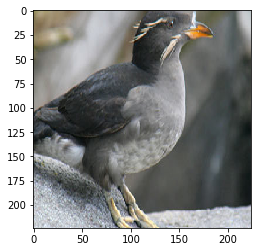

In [21]:
import matplotlib.pyplot as plt
plt.imshow(imgs[339]/255)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# minMax = StandardScaler()
# imgs = minMax.fit_transform(imgs)
# imgs[1]
min_size_x=min_size_x/255
xtr,xte,ytr,yte=train_test_split(min_size_x,min_size_y_,test_size=0.2,random_state=1)

In [23]:
 minMax.fit_transform?

Object `minMax.fit_transform` not found.


In [49]:
model = Sequential()
# BLOCK 1
model.add(Conv2D(filters = 64, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block1_conv1', input_shape = (224, 224, 3)))   
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block2_pool1'))
model.add(Conv2D(filters = 128, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block1_conv2'))
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block1_pool2'))
 
# BLOCK2
model.add(Conv2D(filters = 256, kernel_size = (9, 9), activation = 'relu', padding = 'same', name = 'block2_conv1'))
model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block2_pool3'))
model.add(Conv2D(filters = 512, kernel_size = (9, 9), activation = 'tanh', padding = 'same', name = 'block2_conv2'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), name = 'block2_pool4'))
 
# BLOCK3
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv1'))   
# # model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv3'))
# model.add(MaxPooling2D(pool_size = (4, 4), strides = (4, 4), name = 'block3_pool'))
 
# # BLOCK4
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv1'))   
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv3'))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'block4_pool'))
 
# # BLOCK5
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv1'))   
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv2'))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv3'))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'block5_pool'))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu', name = 'fc1'))
# model.add(Dropout(rate=0.2))
model.add(Dense(1024, activation = 'relu', name = 'fc2'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,  name = 'prediction'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      15616     
_________________________________________________________________
block2_pool1 (MaxPooling2D)  (None, 56, 56, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 128)       663680    
_________________________________________________________________
block1_pool2 (MaxPooling2D)  (None, 14, 14, 128)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 256)       2654464   
_________________________________________________________________
block2_pool3 (MaxPooling2D)  (None, 3, 3, 256)         0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 3, 3, 512)         10617344  
__________

In [51]:
model.compile(optimizer=Adam(0.00001),
              #loss='mse',
              loss='hinge',
              #loss='categorical_crossentropy',
              #loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(name='bacc', dtype=None,threshold=0.0)]
             )

In [52]:
model.fit(xtr, ytr, epochs=100,validation_data=(xte,yte) )

Train on 271 samples, validate on 68 samples
Epoch 1/100
271/271 [==============================] - 2s 6ms/sample - loss: 0.9991 - bacc: 0.0037 - val_loss: 0.9936 - val_bacc: 0.0000e+00
Epoch 2/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9947 - bacc: 0.0000e+00 - val_loss: 0.9884 - val_bacc: 0.0000e+00
Epoch 3/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9907 - bacc: 0.1697 - val_loss: 0.9847 - val_bacc: 0.2500
Epoch 4/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9812 - bacc: 0.0923 - val_loss: 0.9724 - val_bacc: 0.0441
Epoch 5/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9724 - bacc: 0.1661 - val_loss: 0.9602 - val_bacc: 0.2941
Epoch 6/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9583 - bacc: 0.1033 - val_loss: 0.9304 - val_bacc: 0.0588
Epoch 7/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.9291 - bacc: 0.3911 - val_loss: 0.9116 - v

271/271 [==============================] - 1s 5ms/sample - loss: 0.1380 - bacc: 0.4871 - val_loss: 0.3273 - val_bacc: 0.4118
Epoch 61/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.1219 - bacc: 0.4871 - val_loss: 0.3421 - val_bacc: 0.4559
Epoch 62/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.1203 - bacc: 0.4908 - val_loss: 0.3363 - val_bacc: 0.4412
Epoch 63/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.1163 - bacc: 0.4908 - val_loss: 0.3288 - val_bacc: 0.4265
Epoch 64/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.1245 - bacc: 0.4871 - val_loss: 0.3237 - val_bacc: 0.3971
Epoch 65/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.1123 - bacc: 0.4871 - val_loss: 0.3323 - val_bacc: 0.3824
Epoch 66/100
271/271 [==============================] - 1s 5ms/sample - loss: 0.0996 - bacc: 0.4945 - val_loss: 0.3036 - val_bacc: 0.4265
Epoch 67/100
271/271 [=========================

In [43]:
rs=model.predict(min_size_x)
rs_trans=[1 if i>0 else -1 for i in rs]
sk.metrics.accuracy_score(min_size_y_,rs_trans)

0.9734513274336283

In [44]:
rs=model.predict(xte)
equals=[i for i in rs if i>0.5]
len(equals)/len(rs)

0.5